In [1]:
#Naive Bayes
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('processed_data.csv')

df_majority = df[df['Privacy Exists']==0]
df_minority = df[df['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2750,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.iloc[:, 1:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)

X_new = SelectKBest(f_classif, k=89).fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)

In [2]:
from sklearn.naive_bayes import GaussianNB
models = {
    'Gradient Boosting': GaussianNB()
}

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


for name, model in models.items():
    print('Training', name)

    clf = model
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train = cross_val_score(clf, y_train, y_pred_train, cv=10)
    print('train cross val',scores_train.mean())
    scores_test = cross_val_score(clf, y_test, y_pred_test, cv=10)
    print('test cross val',scores_test.mean())

    scores_train = accuracy_score(y_train, y_pred_train)
    print('train acc',scores_train.mean())
    scores_test = accuracy_score(y_test, y_pred_test)
    print('test acc',scores_test.mean())

Training Gradient Boosting
train cross val 0.8728332273786819
test cross val 0.8825434243176179
train acc 0.6066611615744564
test acc 0.5911424903722722


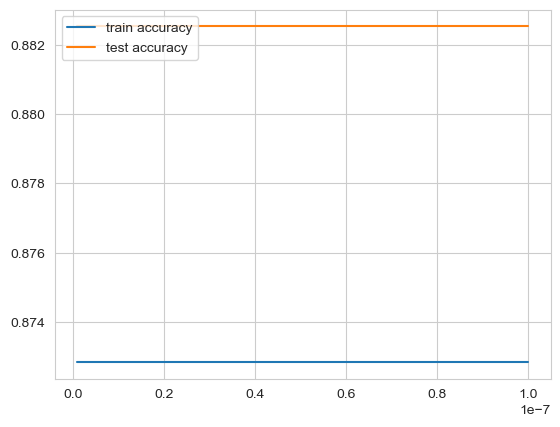

In [11]:
#hyperparameter Tune!!!!!!!!!!!!!!!!
import seaborn as sns

train_accs_cross = []
test_accs_cross = []


#rng = list(range(50,500,50))
#rng = [i / 100 for i in range(1,100,5)]
#rng = [1e-9, 1e-8, 1e-7]
#rng = [3]

for tst in rng:

    clf = GaussianNB()
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train_cross = cross_val_score(clf, y_train, y_pred_train, cv=3).mean()
    scores_test_cross = cross_val_score(clf, y_test, y_pred_test, cv=3).mean()
    
    scores_train_asaf = accuracy_score(y_train, y_pred_train).mean()
    scores_test_asaf = accuracy_score(y_test, y_pred_test).mean()

    train_accs_cross.append(scores_train_cross)
    test_accs_cross.append(scores_test_cross)

plt.figure()
sns.set_style("whitegrid")
plt.plot(rng,train_accs_cross, label="train accuracy")
plt.plot(rng,test_accs_cross, label="test accuracy")
plt.legend(loc="upper left")
plt.show()

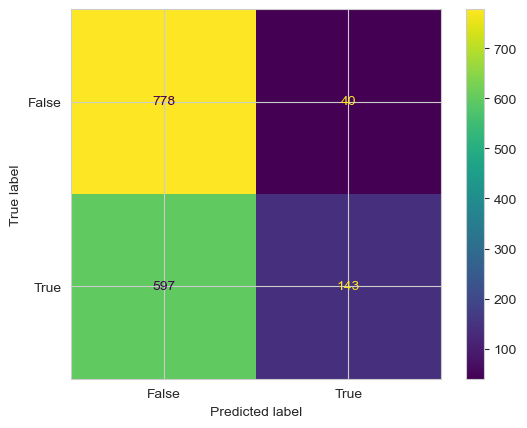

<Figure size 640x480 with 0 Axes>

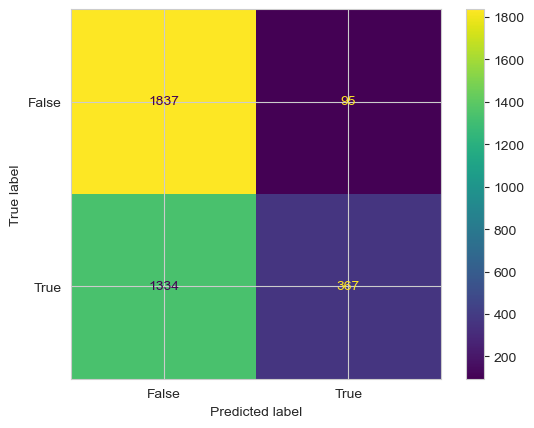

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.figure()

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()
